In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
import pickle

In [4]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

/home/yj9xs/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


(0, 110)

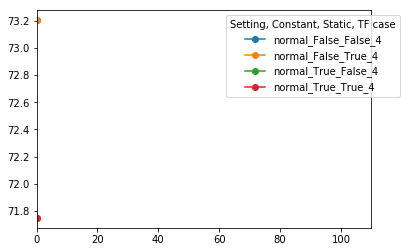

In [5]:
out = pickle.load(open('../predictions/zero/lr-tf-Austin-SanDiego-all.pkl','r'))
out
for case in [4]:
    for constant in ['False', 'True']:
        for static in ['False','True']:
            for transfer in ['normal']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(label=algo, marker='o')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant, Static, TF case')
plt.xlim((0, 110))
# plt.savefig("../results/case-4-comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

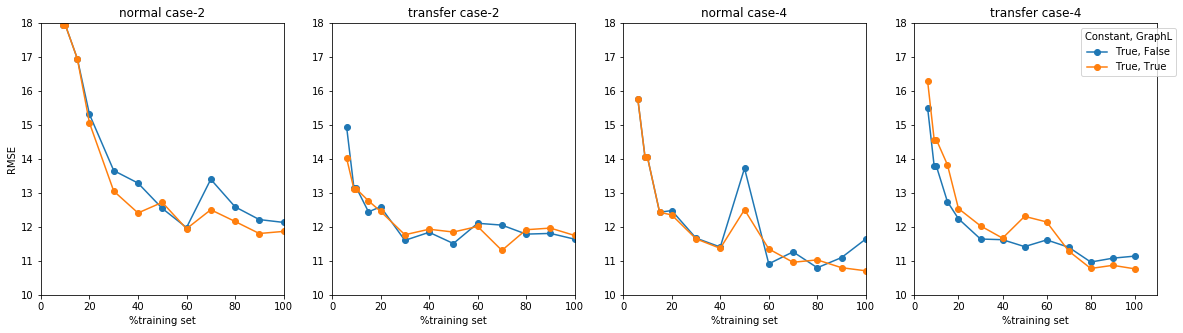

In [18]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-part.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['normal']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,18), xlim=(0,100))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,18), xlim=(0,100))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


count += 1
for case in [4]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['normal']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,18), xlim=(0,100))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


count += 1
for case in [4]:
    for constant in ['True']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,18), xlim=(0,100))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


plt.legend(['True, False', 'True, True', 'False, False', 'False, True'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
plt.xlim((0, 110))
plt.savefig("../results/static-comparison-part.pdf", bbox_inches="tight", dpi=300, format='pdf')

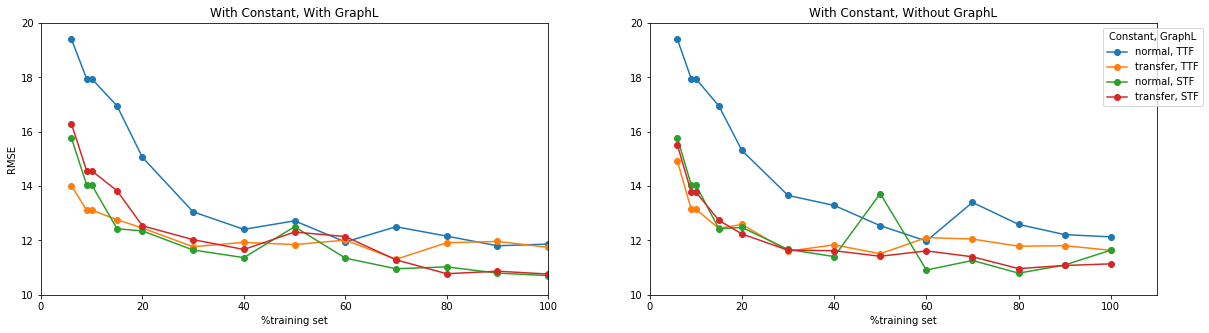

In [17]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-part.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2,4]:
    for constant in ['True']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20), xlim=(0,100))
ax[count].set_title("With Constant, With GraphL")
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2,4]:
    for constant in ['True']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
ax[count].set_title("With Constant, Without GraphL")
ax[count].set_xlabel('%training set')


# count += 1
# for case in [2,4]:
#     for constant in ['False']:
#         for static in ['True']:
#             for transfer in ['normal', 'transfer']:
#                 algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
# #                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
#                 error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
# ax[count].set_title("Without Constant, With GraphL")
# ax[count].set_xlabel('%training set')


# count += 1
# for case in [2,4]:
#     for constant in ['False']:
#         for static in ['False']:
#             for transfer in ['normal', 'transfer']:
#                 algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
# #                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
#                 error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
# ax[count].set_title("Without Constant, Without GraphL")
# ax[count].set_xlabel('%training set')


plt.legend(['normal, TTF', 'transfer, TTF', 'normal, STF', 'transfer, STF'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
plt.xlim((0, 110))
plt.savefig("../results/comparison_part.pdf", bbox_inches="tight", dpi=300, format='pdf')

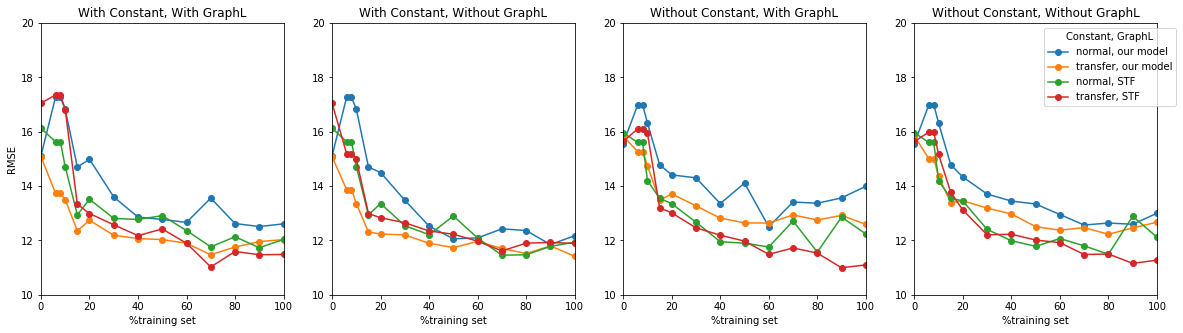

In [11]:
out = pickle.load(open('../predictions/zero/lr-tf-Austin-SanDiego-all.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2,4]:
    for constant in ['True']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
ax[count].set_title("With Constant, With GraphL")
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2,4]:
    for constant in ['True']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
ax[count].set_title("With Constant, Without GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
ax[count].set_title("Without Constant, With GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(10,20))
ax[count].set_title("Without Constant, Without GraphL")
ax[count].set_xlabel('%training set')


plt.legend(['normal, our model', 'transfer, our model', 'normal, STF', 'transfer, STF'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
# plt.xlim((0, 110))
# plt.savefig("../results/comparison_zero_six.pdf", bbox_inches="tight", dpi=300, format='pdf')

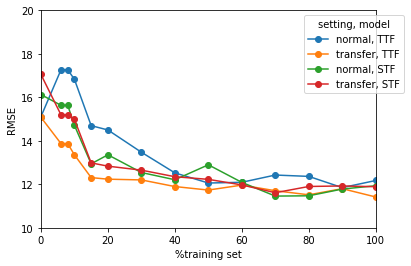

In [25]:
out = pickle.load(open('../predictions/zero/lr-tf-Austin-SanDiego-all.pkl','r'))
out

# fig, axes = plt.subplots(nrows=1, ncols=, figsize=(20, 5))
# ax = axes.flatten()
count = 0


count += 1
for case in [2,4]:
    for constant in ['True']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(label=algo, marker='o', ylim=(10,20))
# ax[count].set_title("With Constant, Without GraphL")
plt.xlabel('%training set')
plt.ylabel('RMSE')


plt.legend(['normal, TTF', 'transfer, TTF', 'normal, STF', 'transfer, STF'], loc='best', bbox_to_anchor=(1.1, 1), title='setting, model')
# plt.xlim((0, 110))
plt.savefig("../results/zero_ttf_stf.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [49]:
(pd.DataFrame(out[2]['True']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)


KeyError: 'True'

In [50]:
(pd.DataFrame(out[4]['False']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)

KeyError: 'True'

In [51]:
out_old = pickle.load(open('../predictions/tf-Austin-SanDiego.pkl','r'))
prev_best = (pd.DataFrame(out_old[4]['True']['normal']).T*pd.Series(contri['SanDiego'])).sum(axis=1)
prev_best_algo = prev_best.loc[[10., 30., 50., 70., 90.]]
prev_best_algo

10.0    15.116675
30.0    12.730277
50.0    12.757884
70.0    12.259274
90.0    12.052088
dtype: float64

In [9]:
error
algo

'transfer_False_True_STF'

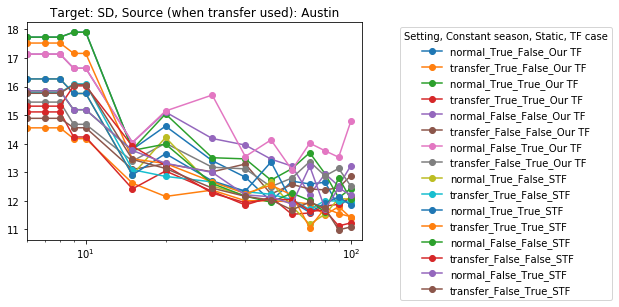

In [13]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'Our TF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', 'False']:
    
        for static in ['False','True']:
            for transfer in ['normal','transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=True)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")

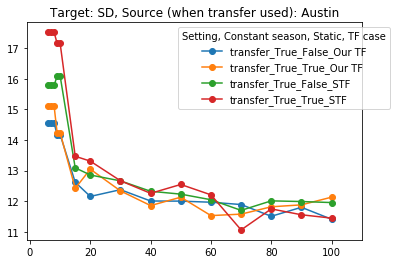

In [14]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'Our TF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', False]:
    
        for static in ['False','True']:
            for transfer in ['transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=False)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")


In [54]:
params = pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego.pkl','r'))


In [115]:
case =2
constant_use = 'True'
static = 'True'
setting = 'transfer'
lrs = {}
n_iter = {}
for train in [10, 30, 50, 70, 90]:
    lrs[train] = []
    n_iter[train] = []
    for random_seed in range(4):
        for fold in range(10):
            lrs[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Learning Rate'])
            n_iter[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Iterations'])
    lrs[train] = pd.value_counts(pd.Series(lrs)[train])
    n_iter[train] = pd.value_counts(pd.Series(n_iter)[train])
lrs = pd.DataFrame(lrs)
n_iter = pd.DataFrame(n_iter)

In [117]:
pd.DataFrame(n_iter)

,10,30,50,70,90
100,4,10,11,8,13
700,10,12,12,15,5
1300,26,18,17,17,22


In [100]:
lr_optimal = {}
for train in [10, 30, 50, 70, 90]:
    lr_optimal[train] = pd.value_counts(pd.DataFrame(a)[train])
    

In [ ]:
pd.DataFrame(lrs).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal Learning Rate for \n Our TF Transfer from Austin ->SD")
plt.legend(title="Learning rate")

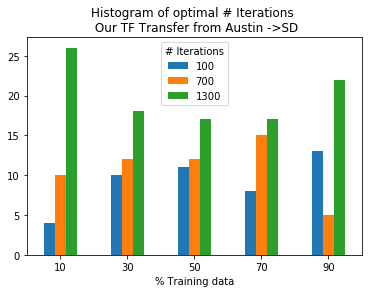

In [126]:
pd.DataFrame(n_iter).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal # Iterations \n Our TF Transfer from Austin ->SD")
plt.legend(title="# Iterations")